In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv("Advertising-Dataset.csv")
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [3]:
df.shape

(200, 4)

In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Training and Test split

In [5]:
test_size = 0.2
row = df.shape[0]

test_indices = np.random.choice(row, size=int(row * test_size),replace = False)
test_rows = []
for i in test_indices:
    test_rows.append(df.iloc[i])
    
train_rows = []
for i in range(0,df.shape[0]):
    if i not in test_indices:
        train_rows.append(df.iloc[i])



In [6]:
test = pd.DataFrame(test_rows)
print(test.shape)
test

(40, 4)


TV  Radio  Newspaper  Sales
180  156.6    2.6        8.3   15.5
56     7.3   28.1       41.4    5.5
33   265.6   20.0        0.3   17.4
19   147.3   23.9       19.1   14.6
87   110.7   40.6       63.2   16.0
53   182.6   46.2       58.7   21.2
122  224.0    2.4       15.6   16.6
49    66.9   11.7       36.8    9.7
168  215.4   23.6       57.6   17.1
193  166.8   42.0        3.6   19.6
129   59.6   12.0       43.1    9.7
144   96.2   14.8       38.9   12.3
8      8.6    2.1        1.0    4.8
177  170.2    7.8       35.2   16.7
171  164.5   20.9       47.4   17.5
46    89.7    9.9       35.7   10.6
71   109.8   14.3       31.7   12.4
130    0.7   39.6        8.7    1.6
90   134.3    4.9        9.3   14.0
120  141.3   26.8       46.2   15.5
32    97.2    1.5       30.0   13.2
190   39.5   41.1        5.8   10.8
51   100.4    9.6        3.6   10.7
40   202.5   22.3       31.6   16.6
72    26.8   33.0       19.3    8.8
135   48.3   47.0        8.5   11.6
91    28.6    1.5       33.0    7.3
5      8.7   48.9       75.0    7.2
95   163.3   31.6       52.9   16.9
13    97.5    7.6        7.2   13.7
187  191.1   28.7       18.2   17.3
142  220.5   33.2       37.9   20.1
141  193.7   35.4       75.6   19.2
2     17.2   45.9       69.3   12.0
185  205.0   45.1       19.6   22.6
89   109.8   47.8       51.4   16.7
3    151.5   41.3       58.5   16.5
157  149.8    1.3       24.3   10.1
10    66.1    5.8       24.2   12.6
106   25.0   11.0       29.7    7.2

In [7]:
train = pd.DataFrame(train_rows)
print(train.shape)
train

(160, 4)


TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
4    180.8   10.8       58.4   17.9
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[160 rows x 4 columns]

# Features vs Labels 

# Training Data

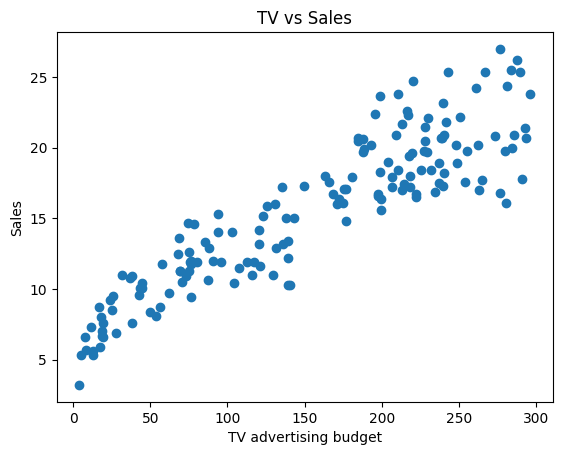

In [8]:

plt.scatter(train["TV"], train["Sales"])
plt.xlabel("TV advertising budget")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()


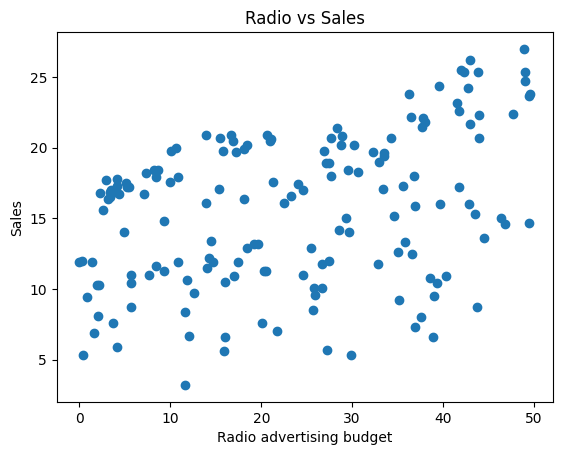

In [9]:

plt.scatter(train["Radio"], train["Sales"])
plt.xlabel("Radio advertising budget")
plt.ylabel("Sales")
plt.title("Radio vs Sales")
plt.show()


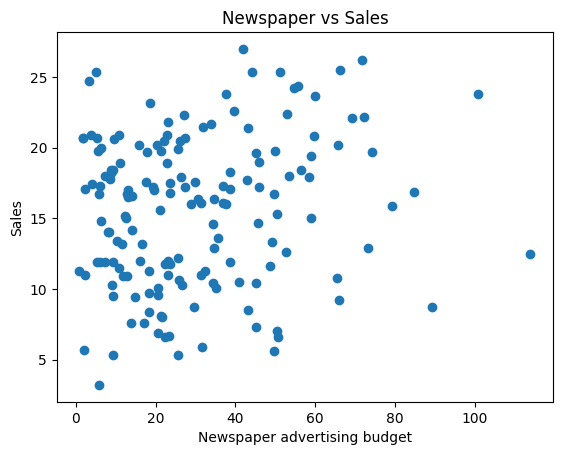

In [10]:

plt.scatter(train["Newspaper"], train["Sales"])
plt.xlabel("Newspaper advertising budget")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")
plt.show()


# Test Data

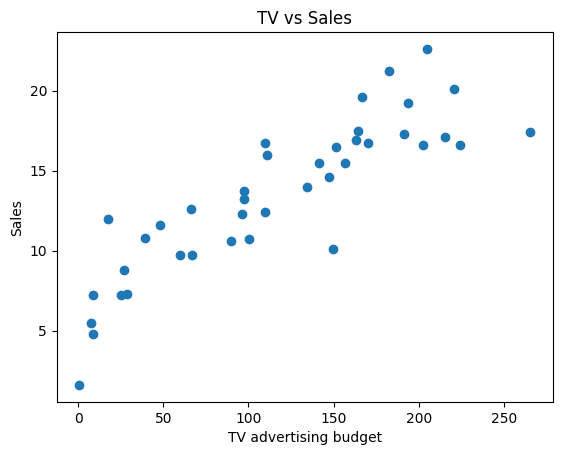

In [11]:

plt.scatter(test["TV"], test["Sales"])
plt.xlabel("TV advertising budget")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()


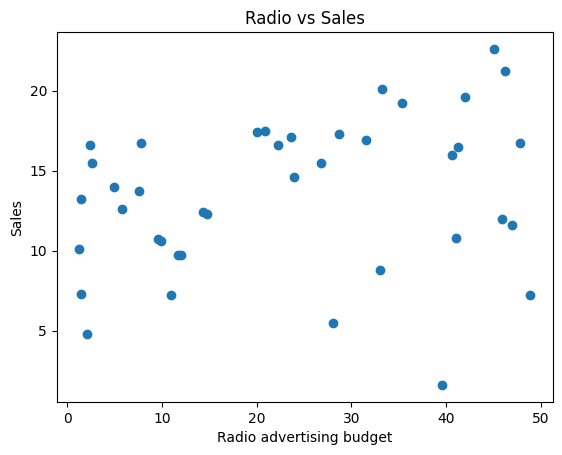

In [12]:

plt.scatter(test["Radio"], test["Sales"])
plt.xlabel("Radio advertising budget")
plt.ylabel("Sales")
plt.title("Radio vs Sales")
plt.show()


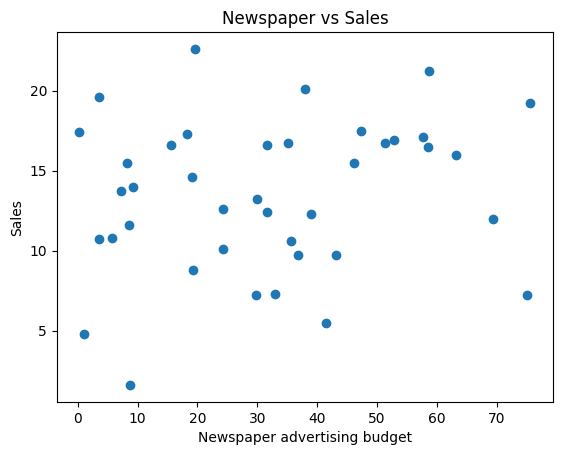

In [13]:

plt.scatter(test["Newspaper"], test["Sales"])
plt.xlabel("Newspaper advertising budget")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")
plt.show()


# Fitting to curve

In [14]:
# Compute correlation of all features with the label
correlations = df.corr()['Sales'].drop('Sales')  # drop self-correlation
print(correlations)


TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [15]:
# Compute correlation of all features with the label
correlations = df.corr()['TV'].drop('TV')  
print(correlations)


Radio        0.054809
Newspaper    0.056648
Sales        0.901208
Name: TV, dtype: float64


In [16]:
# Compute correlation of all features with the label
correlations = df.corr()['Radio'].drop('Radio')  
print(correlations)


TV           0.054809
Newspaper    0.354104
Sales        0.349631
Name: Radio, dtype: float64


In [17]:
# Compute correlation of all features with the label
correlations = df.corr()['Newspaper'].drop('Newspaper')  
print(correlations)


TV       0.056648
Radio    0.354104
Sales    0.157960
Name: Newspaper, dtype: float64


Comparing this Correlation Values we can say we can use only one feature "TV" as input

# Normalization

In [18]:
X = df["TV"]
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [19]:
type(X)

pandas.core.series.Series

In [20]:
y = df["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [21]:

data = df.drop('Sales', axis=1)
mean = data.mean(axis=0)
std = data.std(axis=0)

train_x = train.drop('Sales', axis=1)
test_x = test.drop('Sales', axis=1)

train_scaled_x = (train_x - mean) / std
test_scaled_x = (test_x - mean) / std

train_y = train['Sales'].values
test_y = test['Sales'].values

In [22]:
train_y = train['Sales']
train_y

0      22.1
1      10.4
4      17.9
6      11.8
7      13.2
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 160, dtype: float64

# Error Prediction

In [23]:
def squared_error(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1, 1)#convering in column vector
    y_pred = np.asarray(y_pred)# converting in column vector
    m = len(y_true)
    return float((1 / (2 * m)) * np.sum((y_pred - y_true)**2))


# Predicting Values

In [24]:
def predict(x, W, degree):
    X = poly_features(x, degree)
    return X @ W

# Polynomial Format Conversion

In [25]:
import pandas as pd
import numpy as np

def poly_features(train_scaled_x, poly_degree=1):
    m, d = train_scaled_x.shape
    feature_names = train_scaled_x.columns 

    train_arr = np.ones((m, 1))
    col_names = ["bias"]

    for i in range(1, poly_degree + 1):
        train_arr = np.hstack([train_arr, train_scaled_x.values ** i])
        for name in feature_names:
            col_names.append(f"{name}^{i}")

    train_arr = pd.DataFrame(train_arr, columns=col_names)
    return train_arr




In [26]:
X = poly_features(train_scaled_x, 2)
m, n = X.shape
W = np.zeros((n, 1))
y_pred = X@W
y_pred

0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
155  0.0
156  0.0
157  0.0
158  0.0
159  0.0

[160 rows x 1 columns]

# Full Batch Gradient Descent

In [27]:
def gradient_descent(train_scaled_x, train_y, degree, lr=0.05, epochs=5000, tol=1e-6):
    X = poly_features(train_scaled_x, degree)
    y = np.asarray(train_y).reshape(-1, 1) 
    m, n = X.shape
    W = np.zeros((n, 1))

    for epoch in range(epochs):
        y_pred = X @ W
        gradient = (1/m) * (X.T @ (y_pred - y))

        W = W - lr * gradient  

        y_train_pred = X @ W
        train_error = (np.mean((y - y_train_pred)**2))/2

        if train_error < tol:
            print(f"Early stopping at epoch {epoch}, MSE={train_error:.6e}")
            break

    return W


# Prediction

In [28]:
# 2. Train & Evaluate
results = []

for n in range(1, 10):  # polynomial degrees
    W = gradient_descent(train_scaled_x, train_y, degree=n, lr=0.05, epochs=1000)
    y_test_pred = predict(test_scaled_x, W, degree=n)
    test_error = squared_error(test_y, y_test_pred)

    results.append((n, test_error))
    print(f"Degree {n}: Test Error = {test_error:.4f}")

Degree 1: Test Error = 2.1455
Degree 2: Test Error = 1.6353
Degree 3: Test Error = 1.7140
Degree 4: Test Error = nan
Degree 5: Test Error = nan
Degree 6: Test Error = nan
Degree 7: Test Error = nan
Degree 8: Test Error = nan
Degree 9: Test Error = nan


In [29]:
for n in range(1, 10):
    lr = 0.05 if n <= 3 else 0.005  
    W = gradient_descent(train_scaled_x, train_y, degree=n, lr=lr, epochs=1000)
    y_test_pred = predict(test_scaled_x, W, degree=n)
    test_error = squared_error(test_y, y_test_pred)
    print(f"Degree {n}: Test Error = {test_error:.4f}")


Degree 1: Test Error = 2.1455
Degree 2: Test Error = 1.6353
Degree 3: Test Error = 1.7140
Degree 4: Test Error = 8978447454250050687954517547516245539669758220272229731795643419525854856319081639579455439549148739072846517738151029818046243948572521390424819782106742784.0000
Degree 5: Test Error = nan
Degree 6: Test Error = nan
Degree 7: Test Error = nan
Degree 8: Test Error = nan
Degree 9: Test Error = nan


 # To avoid Exploding weights

In [30]:
def gradient_descent_clipped(train_scaled_x, train_y, degree, lr=0.05, epochs=5000, tol=1e-6, clip_value=1.0):
    X = poly_features(train_scaled_x, degree).values
    y = np.asarray(train_y).reshape(-1,1)
    m, n = X.shape
    W = np.zeros((n, 1))

    for epoch in range(epochs):
        y_pred = X @ W
        gradient = (1/m) * (X.T @ (y_pred - y))
        
        # Gradient Clipping
        gradient = np.clip(gradient, -clip_value, clip_value)

        # Update weights
        W = W - lr * gradient  

        # Compute training error
        train_error = (np.mean((y - X @ W)**2))/2

        if train_error < tol:
            print(f"Early stopping at epoch {epoch}, MSE={train_error:.6e}")
            break
        if np.isnan(train_error) or np.isinf(train_error):
            print(f"Diverged at epoch {epoch}")
            break

    return W


In [31]:
train_errors = []
test_errors = []

for n in range(1, 10):
    lr = 0.05 if n <= 3 else 0.001
    W = gradient_descent_clipped(train_scaled_x, train_y, degree=n, lr=lr, clip_value=1.0)
    y_train_pred = predict(train_scaled_x, W, degree=n)
    y_test_pred = predict(test_scaled_x, W, degree=n)
    
    train_errors.append(squared_error(train_y, y_train_pred))
    test_errors.append(squared_error(test_y, y_test_pred))

print(train_errors)
print(test_errors)


[1.1717502892870877, 0.9126159070307269, 0.8577728466748852, 9.231202863926184, 8.79057705418675, 9.916958168232728, 10.343888770861561, 13.251722070351448, 17.046087129454616]
[2.1454841547262054, 1.6350322886946043, 1.7122878777979698, 15.851705290013227, 15.841948948739523, 16.36617358673023, 15.879756092305753, 17.871997562442868, 20.891520319149734]


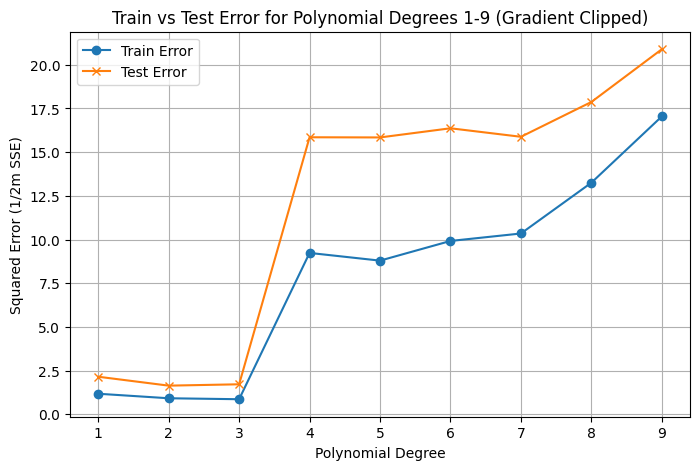

In [32]:
import matplotlib.pyplot as plt

degrees = range(1, 10)

plt.figure(figsize=(8,5))
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='x', label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Squared Error (1/2m SSE)')
plt.title('Train vs Test Error for Polynomial Degrees 1-9 (Gradient Clipped)')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


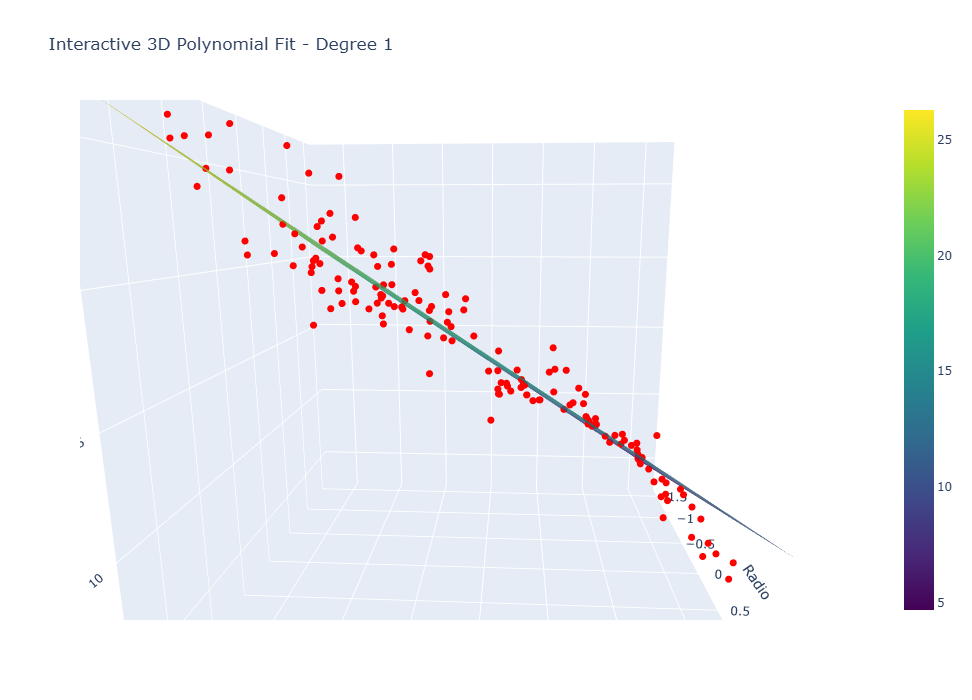

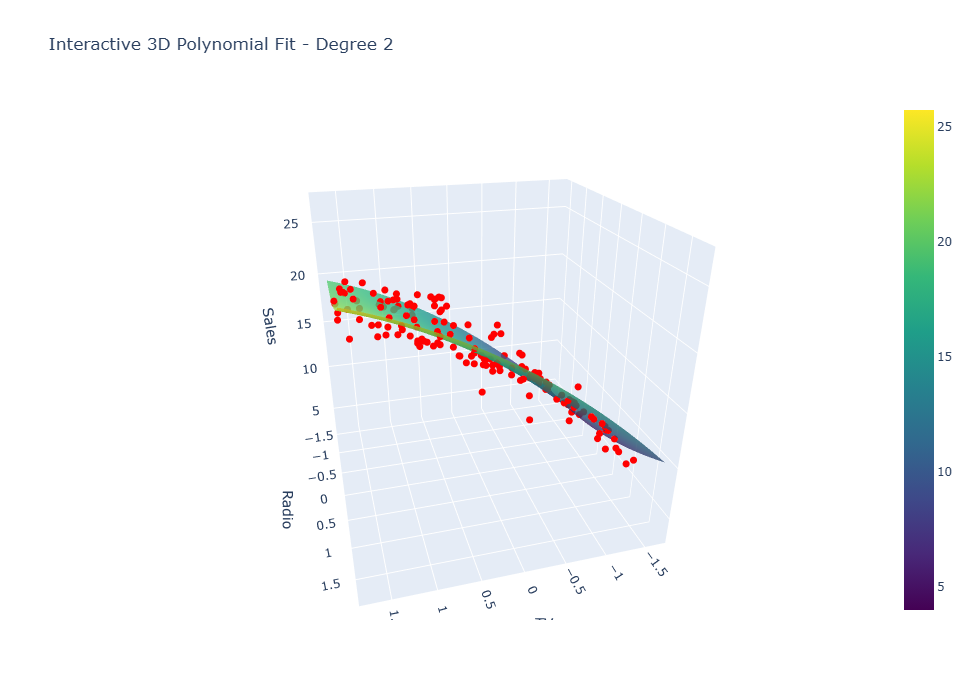

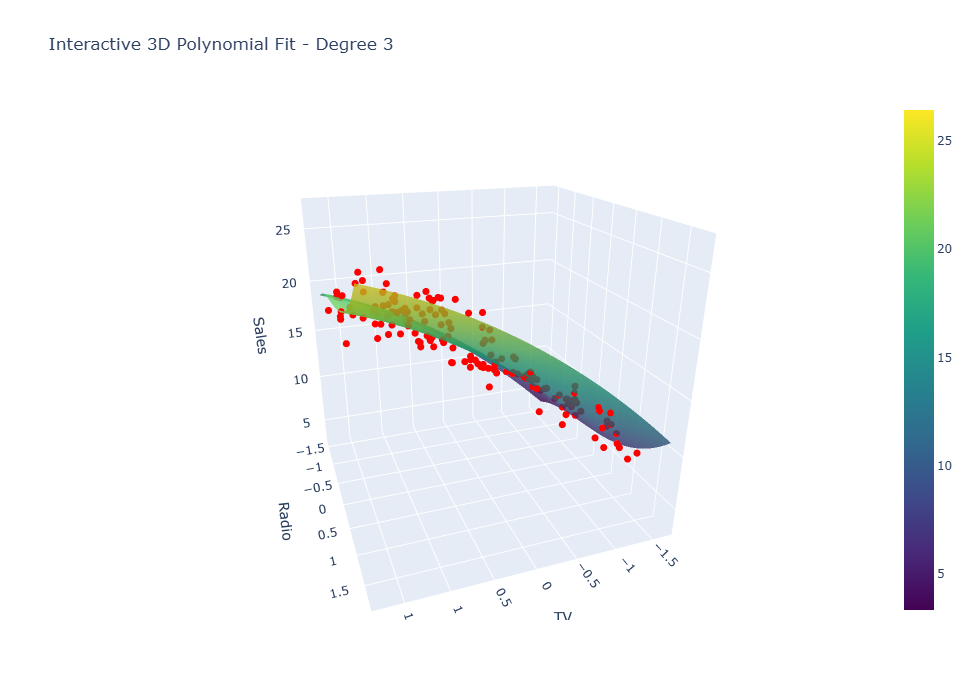

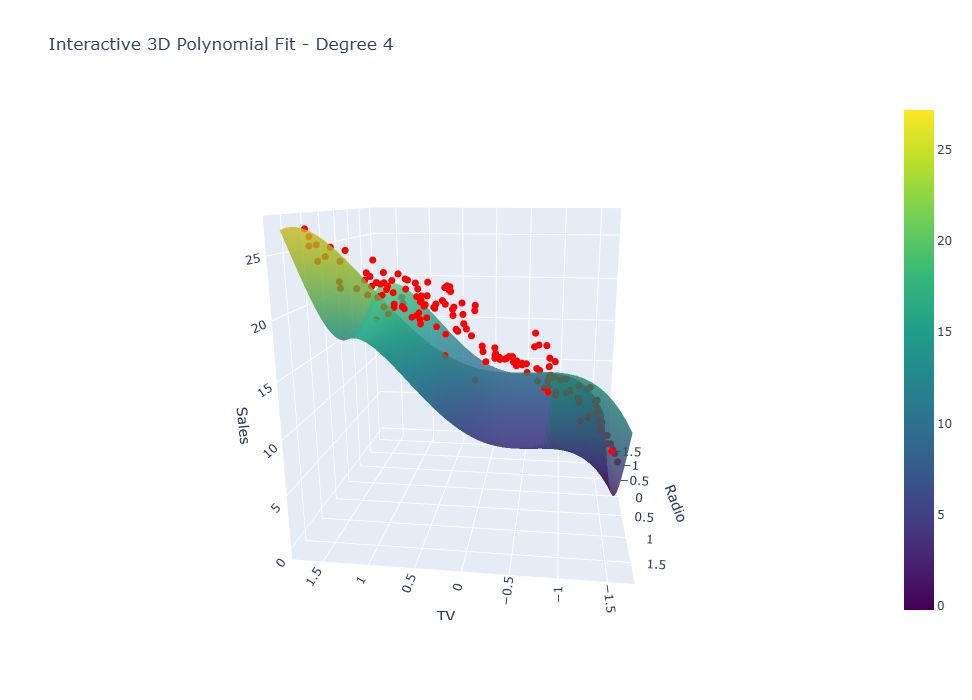

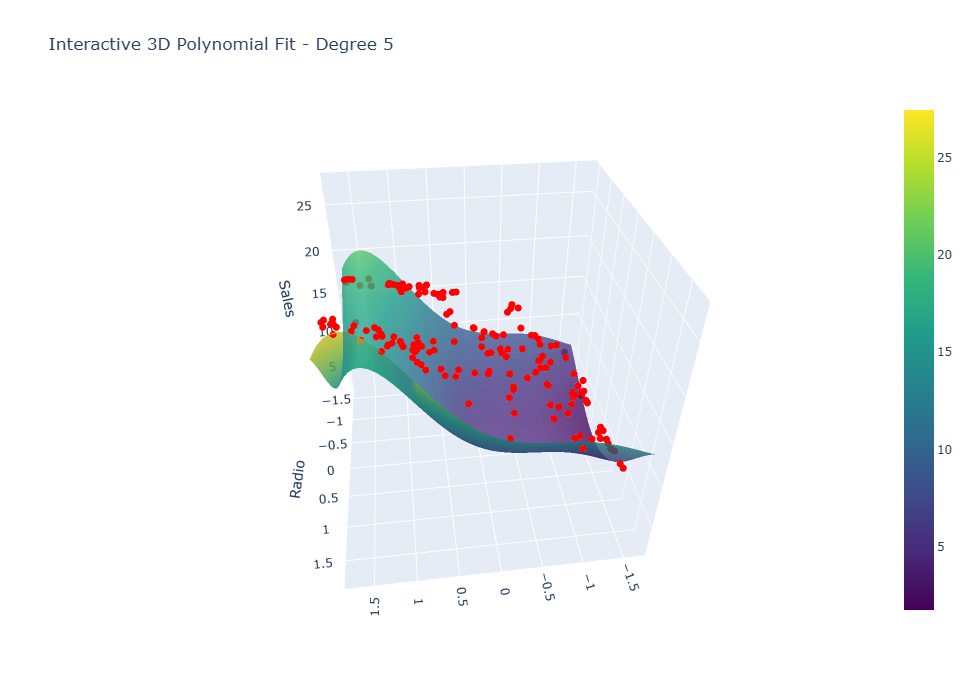

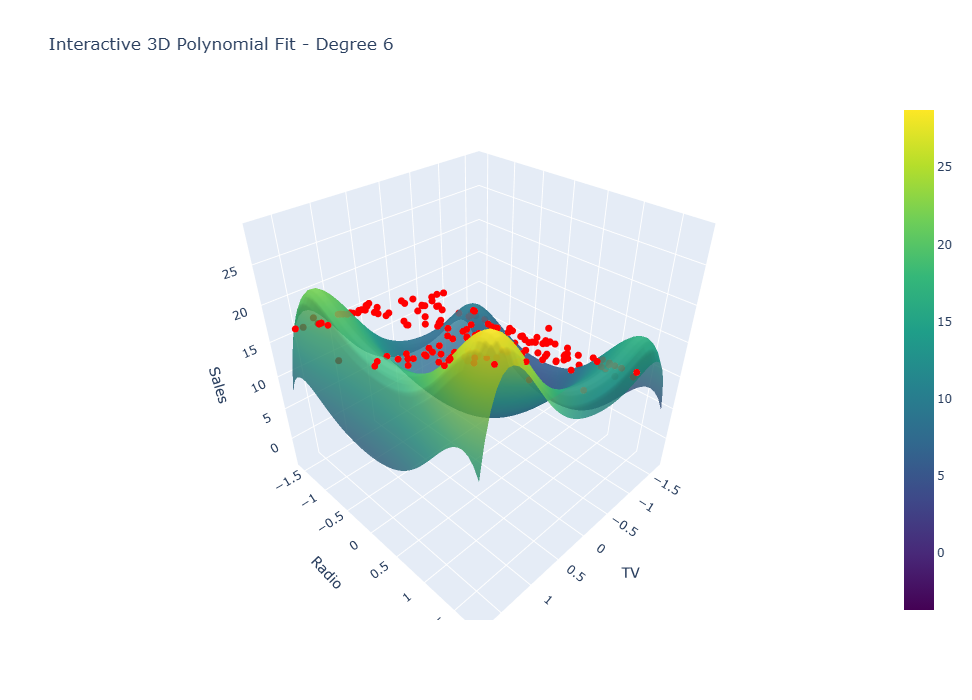

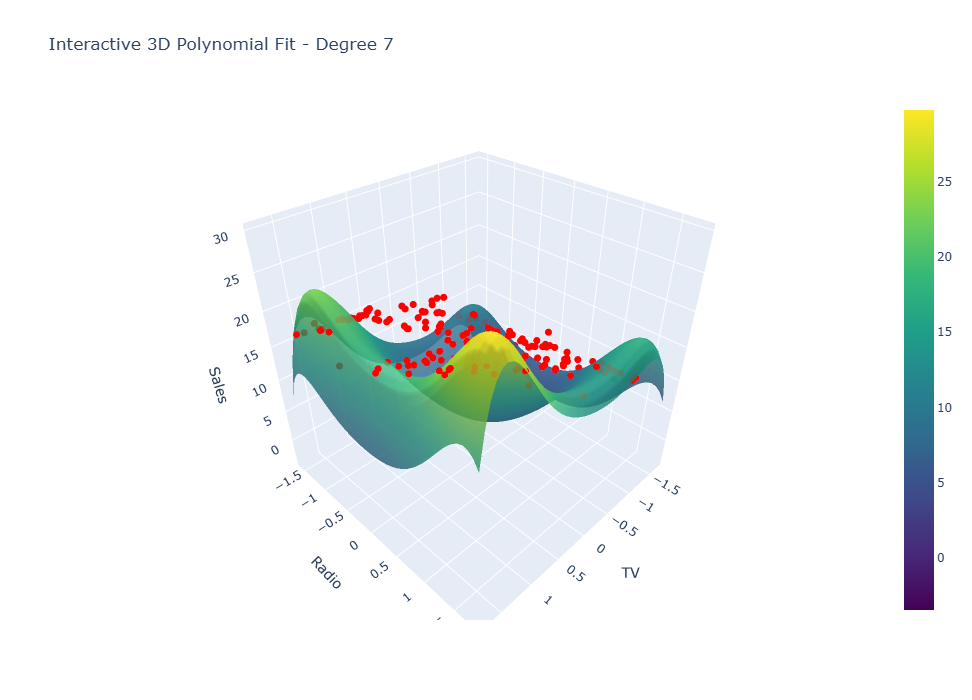

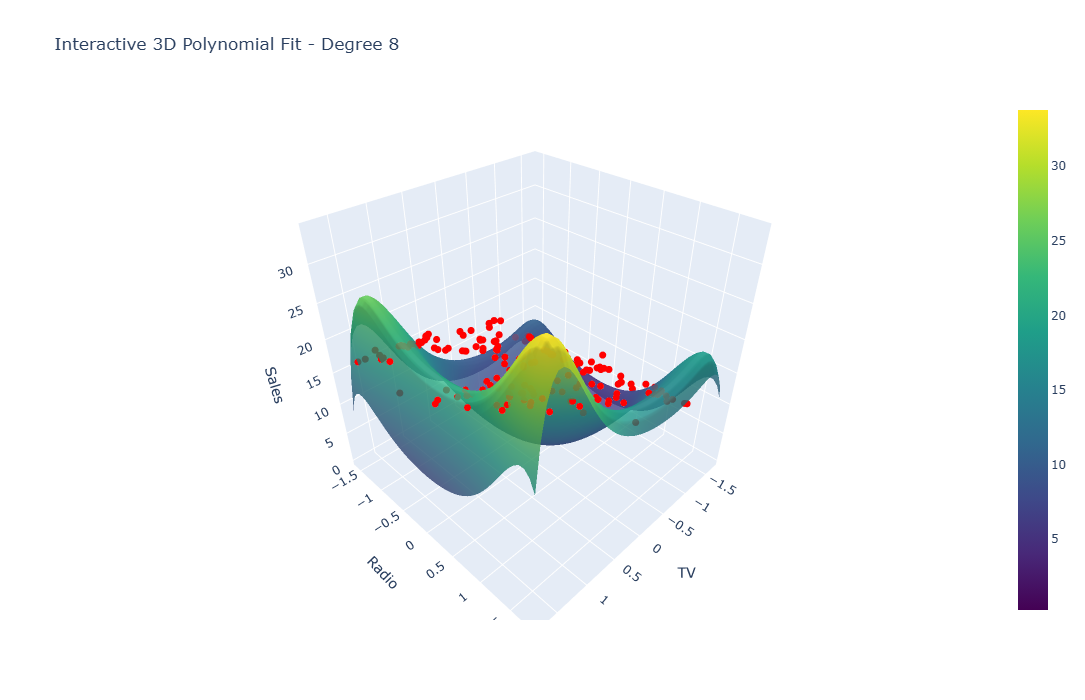

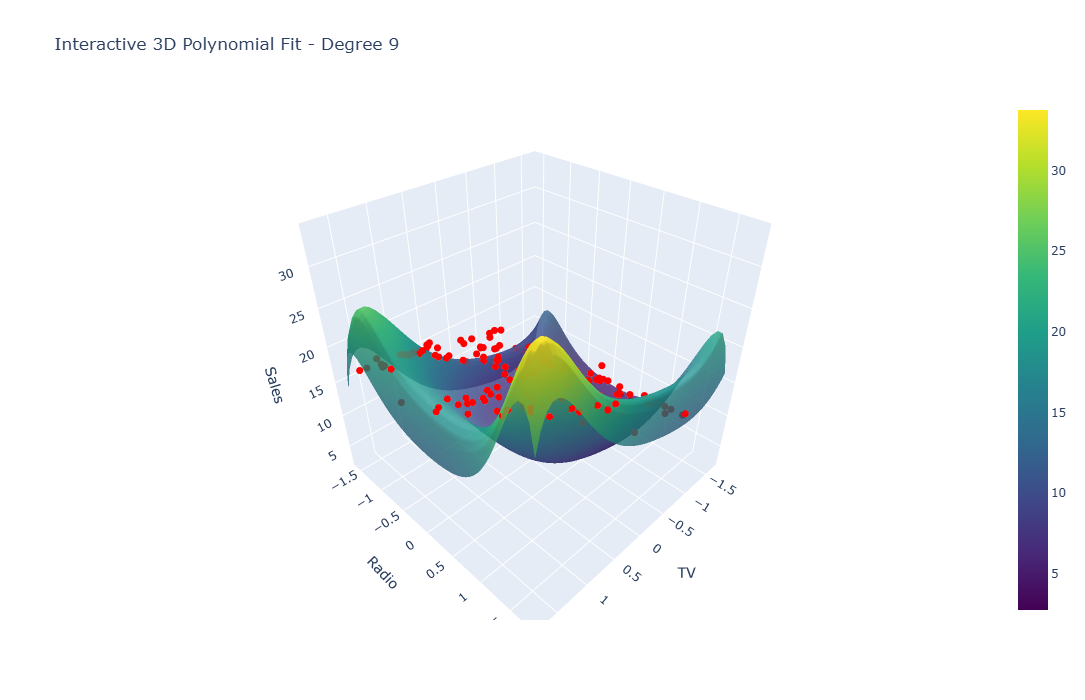

In [33]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Fix third feature at its mean
x3_fixed = train_scaled_x.iloc[:, 2].mean()

# Create grid for first two features
x1_vals = np.linspace(train_scaled_x.iloc[:,0].min(), train_scaled_x.iloc[:,0].max(), 50)
x2_vals = np.linspace(train_scaled_x.iloc[:,1].min(), train_scaled_x.iloc[:,1].max(), 50)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

degrees = range(1, 10)

for n in degrees:
    lr = 0.05 if n <= 3 else 0.001
    W = gradient_descent_clipped(train_scaled_x, train_y, degree=n, lr=lr, clip_value=1.0)
    
    # Prepare grid dataframe
    grid_df = pd.DataFrame({
        train_scaled_x.columns[0]: X1.flatten(),
        train_scaled_x.columns[1]: X2.flatten(),
        train_scaled_x.columns[2]: x3_fixed
    })
    
    y_pred = predict(grid_df, W, degree=n).values.reshape(X1.shape)
    
    # Interactive 3D surface plot
    fig = go.Figure(data=[
        go.Surface(z=y_pred, x=X1, y=X2, colorscale='Viridis', opacity=0.8, name='Fitted Surface'),
        go.Scatter3d(
            x=train_scaled_x.iloc[:,0],
            y=train_scaled_x.iloc[:,1],
            z=train_y,
            mode='markers',
            marker=dict(size=4, color='red'),
            name='Training Data'
        )
    ])
    
    fig.update_layout(
        title=f'Interactive 3D Polynomial Fit - Degree {n}',
        scene=dict(
            xaxis_title=train_scaled_x.columns[0],
            yaxis_title=train_scaled_x.columns[1],
            zaxis_title='Sales'
        ),
        width=800,
        height=700
    )
    
    fig.show()


# Ridge Gradient Descent

In [34]:
def gradient_descent_ridge(X, y, W_init=None, lr=0.01, epochs=5000, tol=1e-6, lambda_=0, clip_value=1.0):
    m, n = X.shape
    W = np.zeros((n, 1)) if W_init is None else W_init.copy()
    loss_history = []

    for epoch in range(epochs):
        y_pred = X @ W
        gradient = (1/m) * (X.T @ (y_pred - y)) + (lambda_/m) * W  # L2 term
        
        # Gradient clipping
        gradient = np.clip(gradient, -clip_value, clip_value)

        W = W - lr * gradient

        loss = (1/(2*m)) * np.sum((y - X @ W)**2) + (lambda_/2) * np.sum(W**2)
        loss_history.append(loss)

        if loss < tol:
            break
        if np.isnan(loss) or np.isinf(loss):
            print(f"Diverged at epoch {epoch}")
            break
    return W, loss_history


# Lasso Gradient Descent

In [35]:
def gradient_descent_lasso(X, y, W_init=None, lr=0.01, epochs=5000, tol=1e-6, lambda_=0, clip_value=1.0):
    m, n = X.shape
    W = np.zeros((n, 1)) if W_init is None else W_init.copy()
    loss_history = []

    for epoch in range(epochs):
        y_pred = X @ W
        gradient = (1/m) * (X.T @ (y_pred - y)) + (lambda_/m) * np.sign(W)  
        
        # Gradient clipping
        gradient = np.clip(gradient, -clip_value, clip_value)

        W = W - lr * gradient

        loss = (1/(2*m)) * np.sum((y - X @ W)**2) + lambda_ * np.sum(np.abs(W))
        loss_history.append(loss)

        if loss < tol:
            break
        if np.isnan(loss) or np.isinf(loss):
            print(f"Diverged at epoch {epoch}")
            break
    return W, loss_history


In [36]:
degrees_to_test = [1,2,3,4,5,6,7,8,9]  # pick the degrees you want
lambdas = [0, 0.25, 0.5, 0.75, 1]
results_ridge = {}
results_lasso = {}

for deg in degrees_to_test:
    X_train_poly = poly_features(train_scaled_x, deg).values
    X_test_poly = poly_features(test_scaled_x, deg).values
    y_train_col = np.asarray(train_y).reshape(-1,1)
    y_test_col = np.asarray(test_y).reshape(-1,1)

    # Ridge
    train_err_ridge = []
    test_err_ridge = []
    for l in lambdas:
        W_ridge, _ = gradient_descent_ridge(X_train_poly, y_train_col, lr=0.05, lambda_=l)
        train_err_ridge.append(squared_error(y_train_col, X_train_poly @ W_ridge))
        test_err_ridge.append(squared_error(y_test_col, X_test_poly @ W_ridge))
    results_ridge[deg] = (train_err_ridge, test_err_ridge)

    # Lasso
    train_err_lasso = []
    test_err_lasso = []
    for l in lambdas:
        W_lasso, _ = gradient_descent_lasso(X_train_poly, y_train_col, lr=0.05, lambda_=l)
        train_err_lasso.append(squared_error(y_train_col, X_train_poly @ W_lasso))
        test_err_lasso.append(squared_error(y_test_col, X_test_poly @ W_lasso))
    results_lasso[deg] = (train_err_lasso, test_err_lasso)


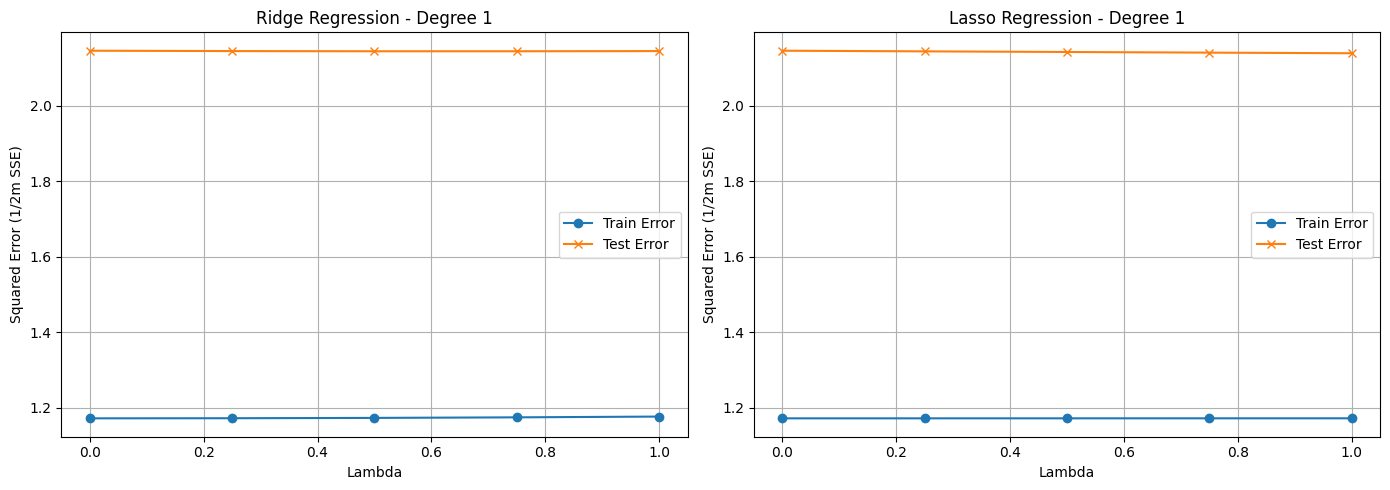

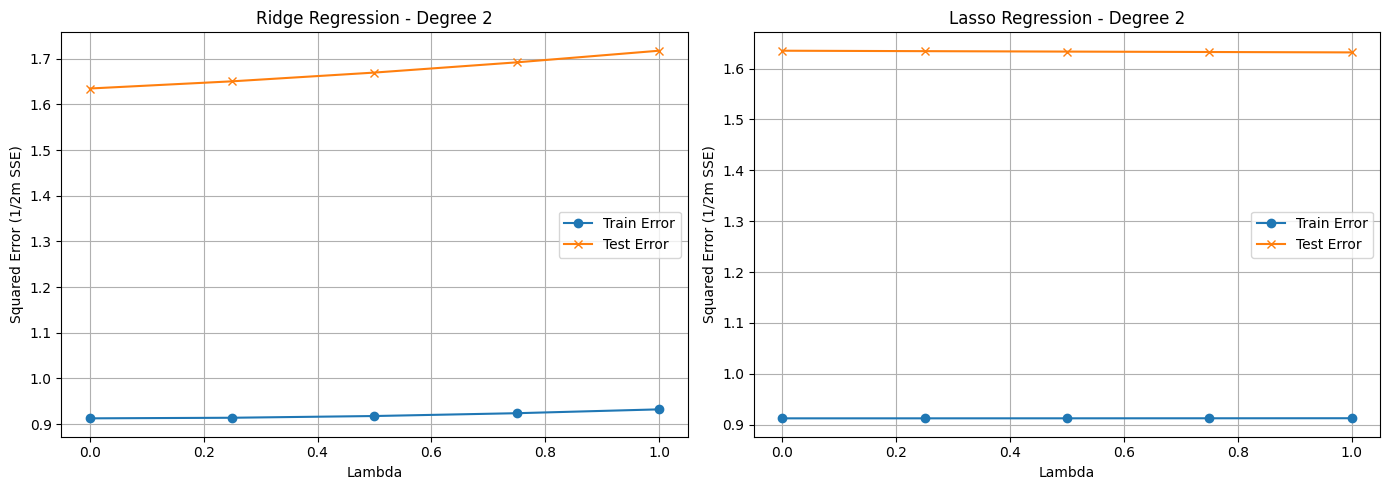

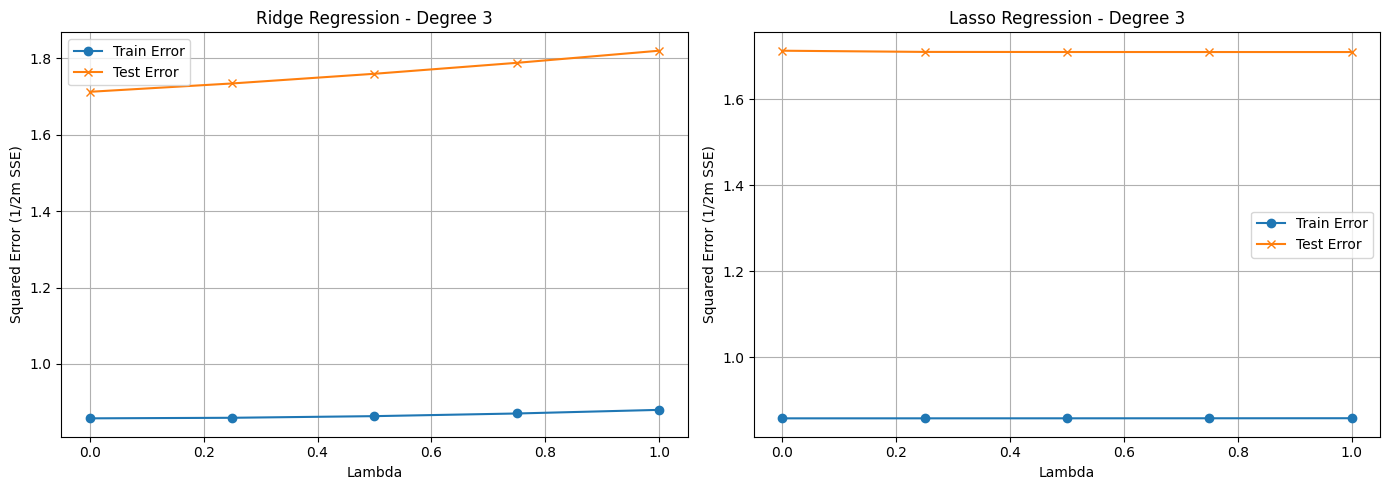

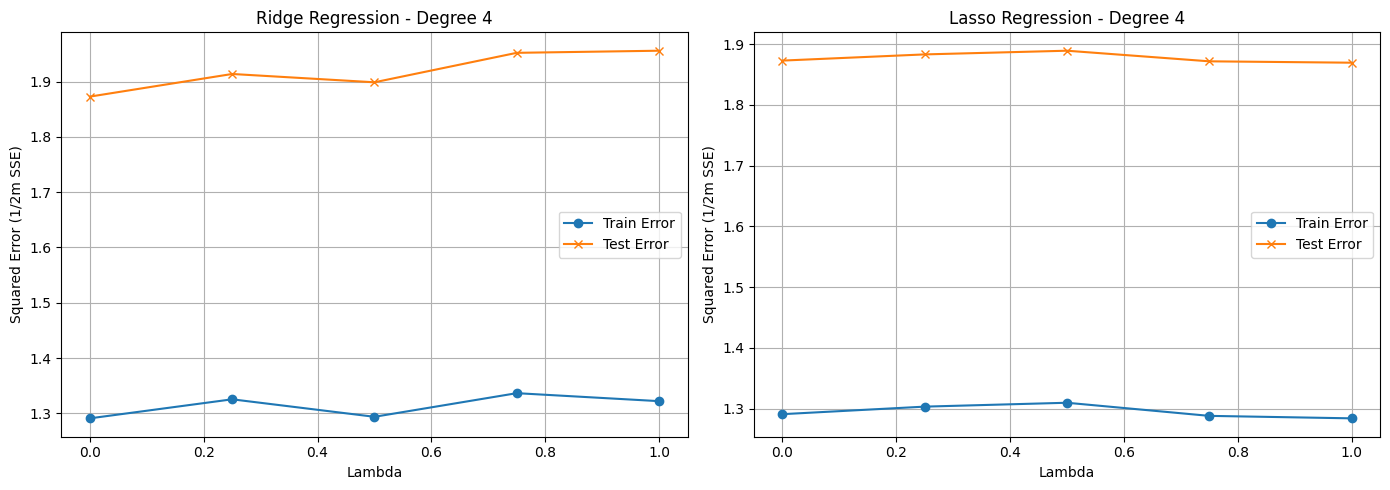

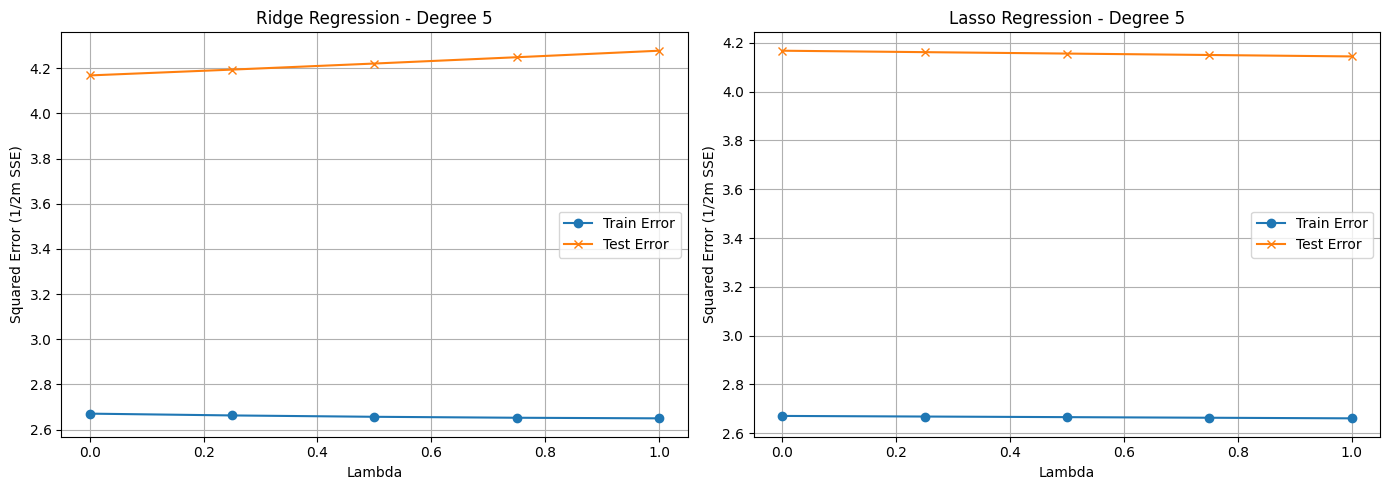

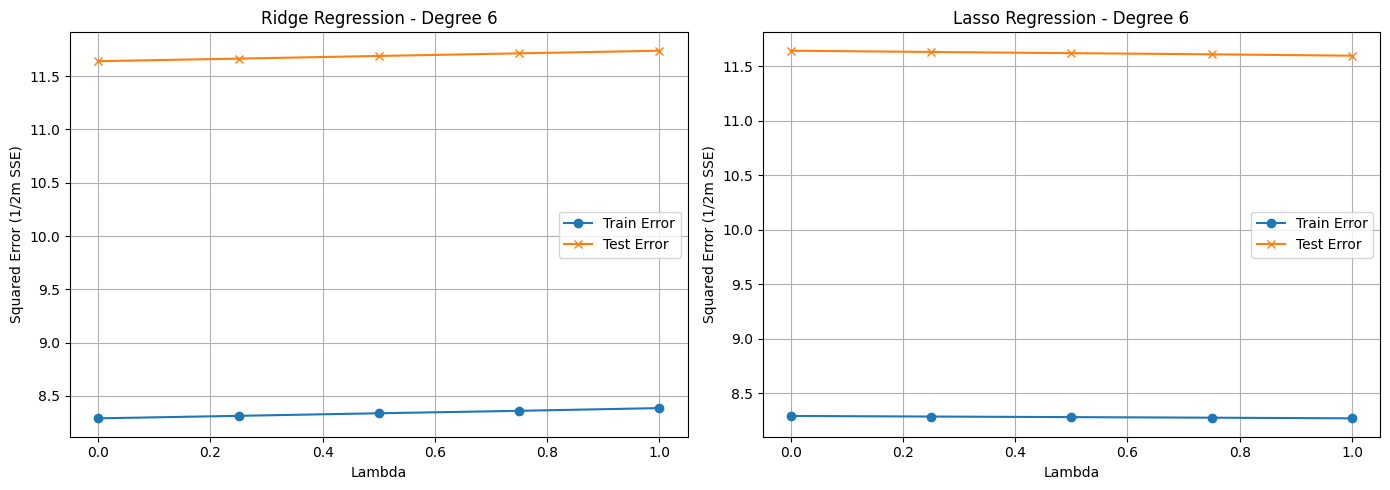

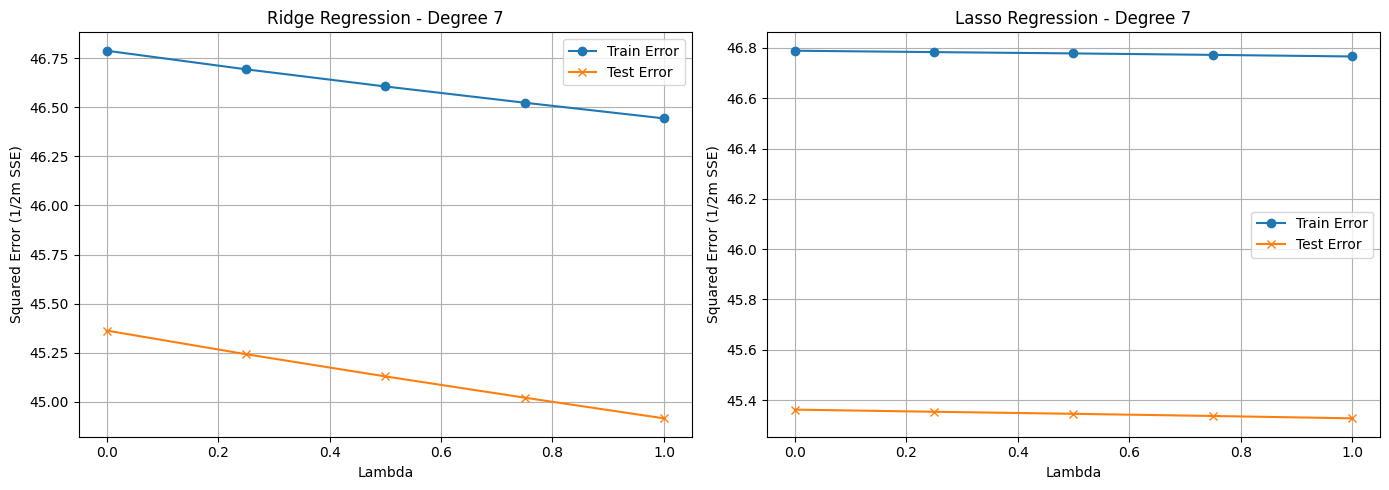

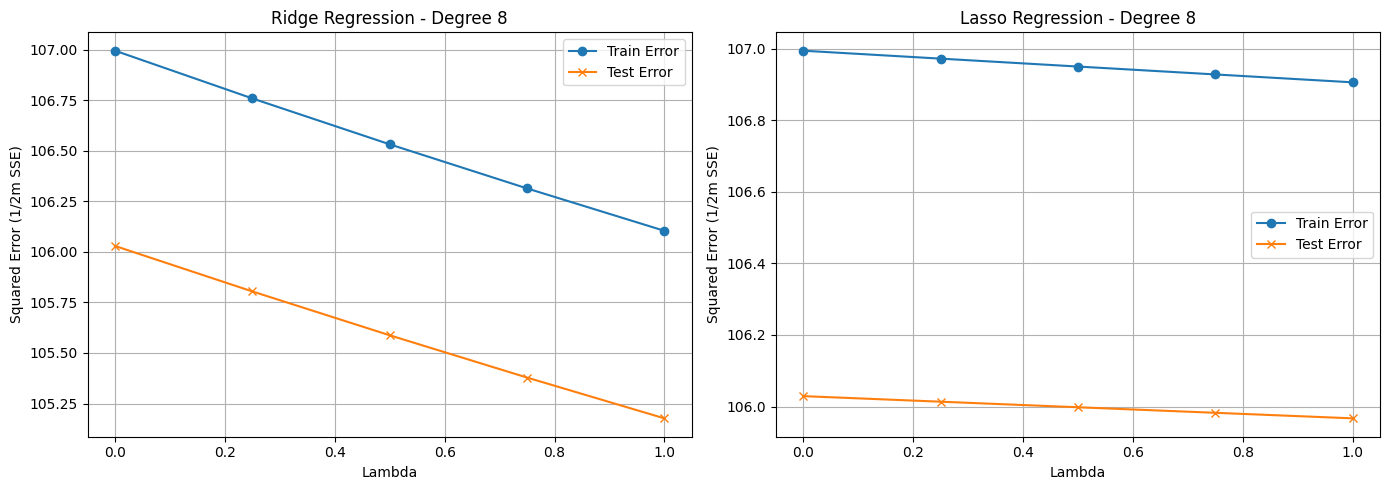

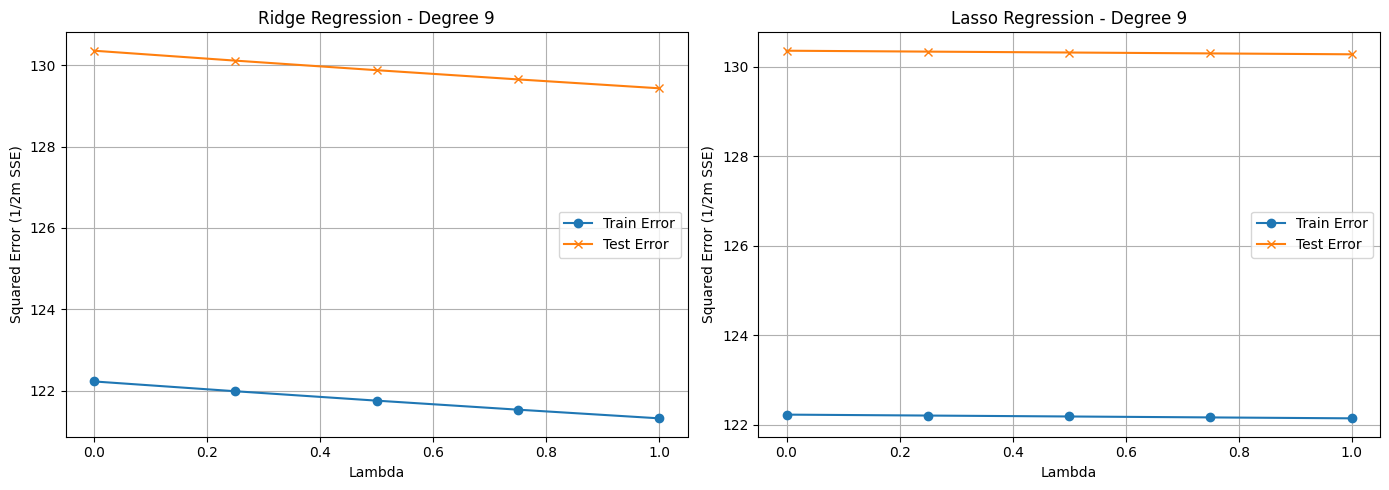

In [37]:
import matplotlib.pyplot as plt

lambdas = [0, 0.25, 0.5, 0.75, 1]
degrees_to_test = [1,2,3,4,5,6,7,8,9]

for deg in degrees_to_test:
    fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

    # Ridge
    axes[0].plot(lambdas, results_ridge[deg][0], marker='o', label='Train Error')
    axes[0].plot(lambdas, results_ridge[deg][1], marker='x', label='Test Error')
    axes[0].set_xlabel('Lambda')
    axes[0].set_ylabel('Squared Error (1/2m SSE)')
    axes[0].set_title(f'Ridge Regression - Degree {deg}')
    axes[0].legend()
    axes[0].grid(True)

    # Lasso
    axes[1].plot(lambdas, results_lasso[deg][0], marker='o', label='Train Error')
    axes[1].plot(lambdas, results_lasso[deg][1], marker='x', label='Test Error')
    axes[1].set_xlabel('Lambda')
    axes[1].set_ylabel('Squared Error (1/2m SSE)')
    axes[1].set_title(f'Lasso Regression - Degree {deg}')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


# Conclusion

Based on the training and test errors for polynomial degrees 1 through 9, we can analyze the model’s performance. For low-degree polynomials (degrees 1–3), both train and test errors are low, with the minimum test error occurring at degree 2. This indicates that the model fits the data well without overfitting, achieving a good balance between bias and variance. As the polynomial degree increases, the bias of the model continues to decrease because higher-degree polynomials can better fit the training data. However, for degrees 4 and above, the errors explode dramatically on both training and test sets. This is not due to high bias but is caused by numerical instability: higher-degree polynomial terms amplify feature values, leading to very large gradients and weight updates during optimization. This phenomenon, often referred to as exploding gradients, results in excessively large predictions and errors.

Considering the tradeoff between bias and variance, degree 2 is the most suitable for this dataset. It achieves the lowest test error, keeps the training error low, and avoids numerical instability, ensuring good generalization to unseen data.